<p style="text-align: center;">
  <strong style="font-size: 2em;">Titanic Survivability: ML Prediction</strong><br>
  <strong>Gibson Weber</strong><br>
  <strong>DATA: 720</strong><br>
  <strong>07/31/2024</strong>
</p>

---

<p style="text-align: center;">
  <img src="https://i0.wp.com/boingboing.net/wp-content/uploads/2023/04/Titanic-sinking-painting-Everett-Collection.png?fit=1&ssl=1&resize=620%2C4000" alt="Titanic Painting" style="width: 60%;"/>
</p>

---

## **Research Objective**
The goal of this project is to develop a machine learning model that accurately predicts the survival of passengers from the Titanic disaster. Key variables such as age, gender, and passenger class will be analyzed to determine their influence on survival rates.

---

## **Relevance/Applications**
Despite occurring over 112 years ago, the sinking of the RMS Titanic remains a pivotal event in maritime history. While modern safety regulations have significantly improved since then, this research aims to provide insights into the demographic factors and ship areas most at risk during emergencies. Understanding these factors can offer valuable historical context and inform contemporary discussions on socio-economic disparities and safety protocols.

---


## **Data Sourcing, Quality, and Completeness**
The [Titanic Data Set](https://www.kaggle.com/c/titanic/data?select=test.csv) is sourced directly from Kaggle as a part of an ongoing Kaggle competition: Titanic – Machine Learning from Disaster (2012).

The data set is broken into two separate CSV files conveniently titled “train.csv” and “test.csv”. The two files are identical except for the outcome variable, “Survived”, which is not present in the test data.

Provided below is the **data dictionary** sourced from Kaggle:
| Variable  | Definition                          | Key                                 |
|-----------|-------------------------------------|-------------------------------------|
| survival  | Survival (Outcome Var.)             | 0 = No, 1 = Yes                     |
| pclass    | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex       | Sex                                 |                                     |
| age       | Age in years                        |                                     |
| sibsp     | # of siblings / spouses aboard the Titanic |                               |
| parch     | # of parents / children aboard the Titanic |                               |
| ticket    | Ticket number                       |                                     |
| fare      | Passenger fare                      |                                     |
| cabin     | Cabin number                        |                                     |
| embarked  | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |

---

In [8]:
# General Data Handling
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Warning Handling
import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('train.csv')
submission_test = pd.read_csv('test.csv')

### **Train Data Set**

In [11]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


### **Test (Submission) Data Set**

In [13]:
submission_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.925,NaN,S
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.750,NaN,Q
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.000,E60,S
32,924,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.0,1,2,C.A. 2315,20.575,NaN,S
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.050,NaN,S


### **Summary Statistics**

In [15]:
# Get summary statistics for each column
summary_statistics = train.describe(include='all')

# Null value count
null_counts = train.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['null_count']).T
summary_statistics = pd.concat([summary_statistics, null_counts_df])

summary_statistics

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


---
## **Exploratory Data Analysis**

### Variable Distributions

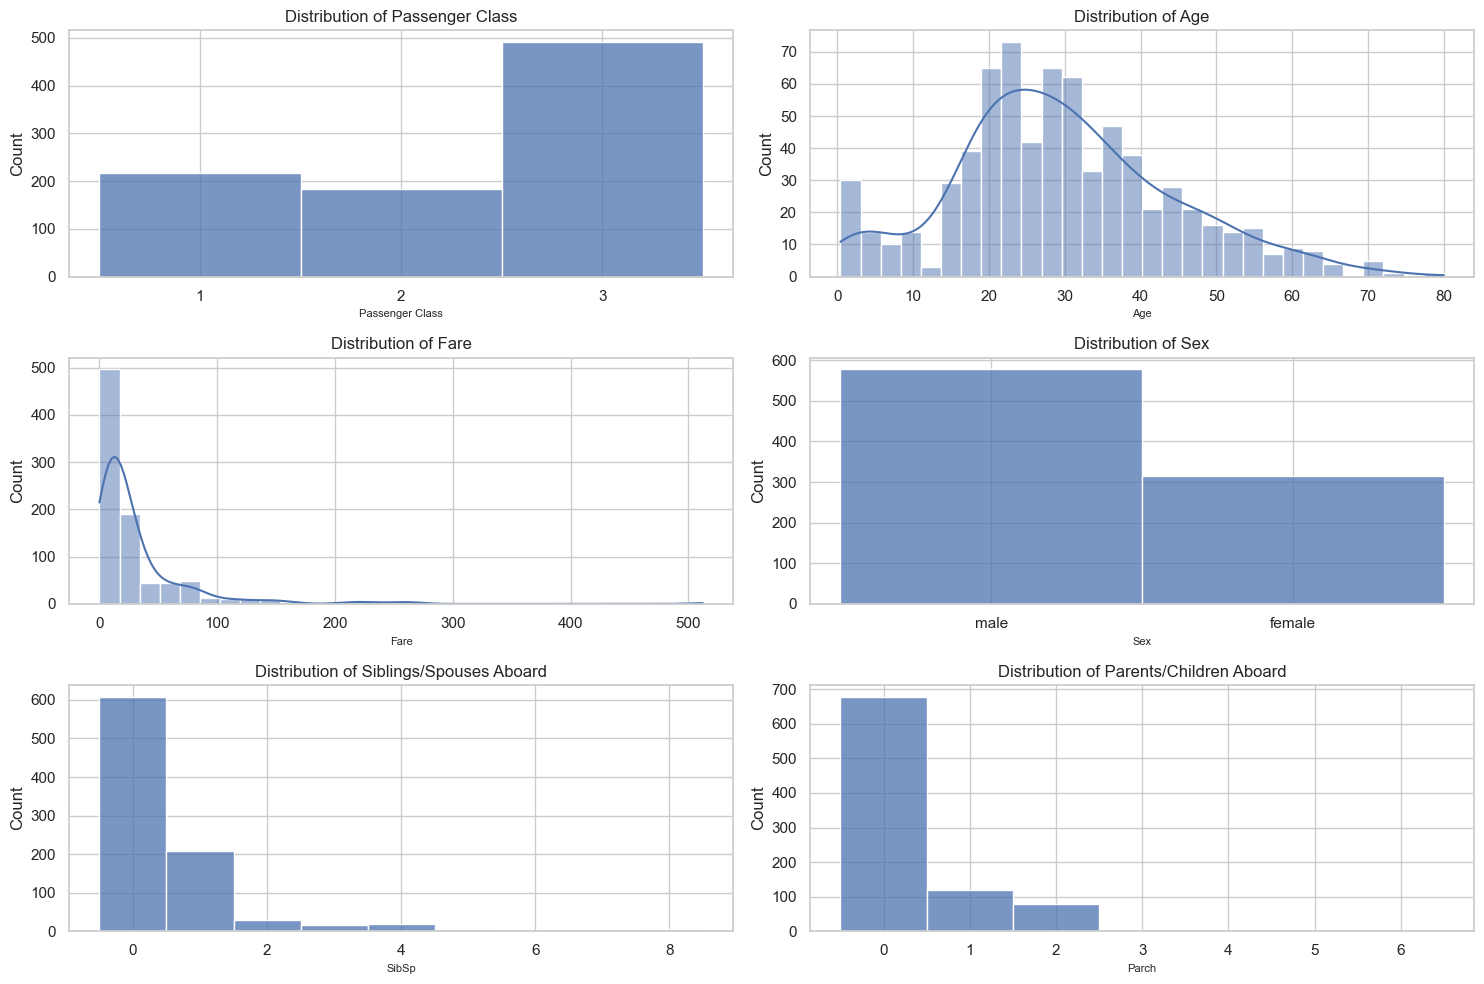

In [18]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create histograms
plt.figure(figsize=(15, 10))  # Adjust the figure size for better layout

# Plot for Pclass
plt.subplot(3, 2, 1)
sns.histplot(train['Pclass'], bins=3, kde=False, discrete=True)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class', fontsize = 8)
plt.ylabel('Count')
plt.xticks([1, 2, 3])

# Plot for Age
plt.subplot(3, 2, 2)
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age', fontsize = 8)
plt.ylabel('Count')

# Plot for Fare
plt.subplot(3, 2, 3)
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare', fontsize = 8)
plt.ylabel('Count')

# Plot for Sex
plt.subplot(3, 2, 4)
sns.histplot(train['Sex'], kde=False, discrete=True)
plt.title('Distribution of Sex')
plt.xlabel('Sex', fontsize = 8)
plt.ylabel('Count')

# Plot for SibSp
plt.subplot(3, 2, 5)
sns.histplot(train['SibSp'], bins=8, kde=False, discrete=True)
plt.title('Distribution of Siblings/Spouses Aboard')
plt.xlabel('SibSp', fontsize = 8)
plt.ylabel('Count')

# Plot for Parch
plt.subplot(3, 2, 6)
sns.histplot(train['Parch'], bins=8, kde=False, discrete=True)
plt.title('Distribution of Parents/Children Aboard')
plt.xlabel('Parch', fontsize = 8)
plt.ylabel('Count')

# Show Plots
plt.tight_layout()
plt.show()

### **Histogram Analysis**

#### *1. Age Distribution*
- The age distribution is right-skewed, with most passengers being younger and fewer older individuals. 
- This skew may impact the analysis and modeling of age-related factors.

#### *2. Fare Distribution*
- The fare distribution is right-skewed and includes several outliers. 
- Most fares are lower, but a few passengers paid significantly more, which may influence the analysis and requires careful consideration.

#### *3. Gender Distribution*
- Men outnumber women nearly 2:1 in the dataset.

---

### **Outlier Handling & Visualization**

- To address significant outliers in the `fare` variable, I created a copy of the original dataset and capped the `fare` values.
- The outlier thresholds were determined using the mean and standard deviation of the `fare` distribution, with values beyond 2 standard deviations from the mean being capped.
- Outliers were adjusted for visualization purposes but retained in the dataset for modeling.

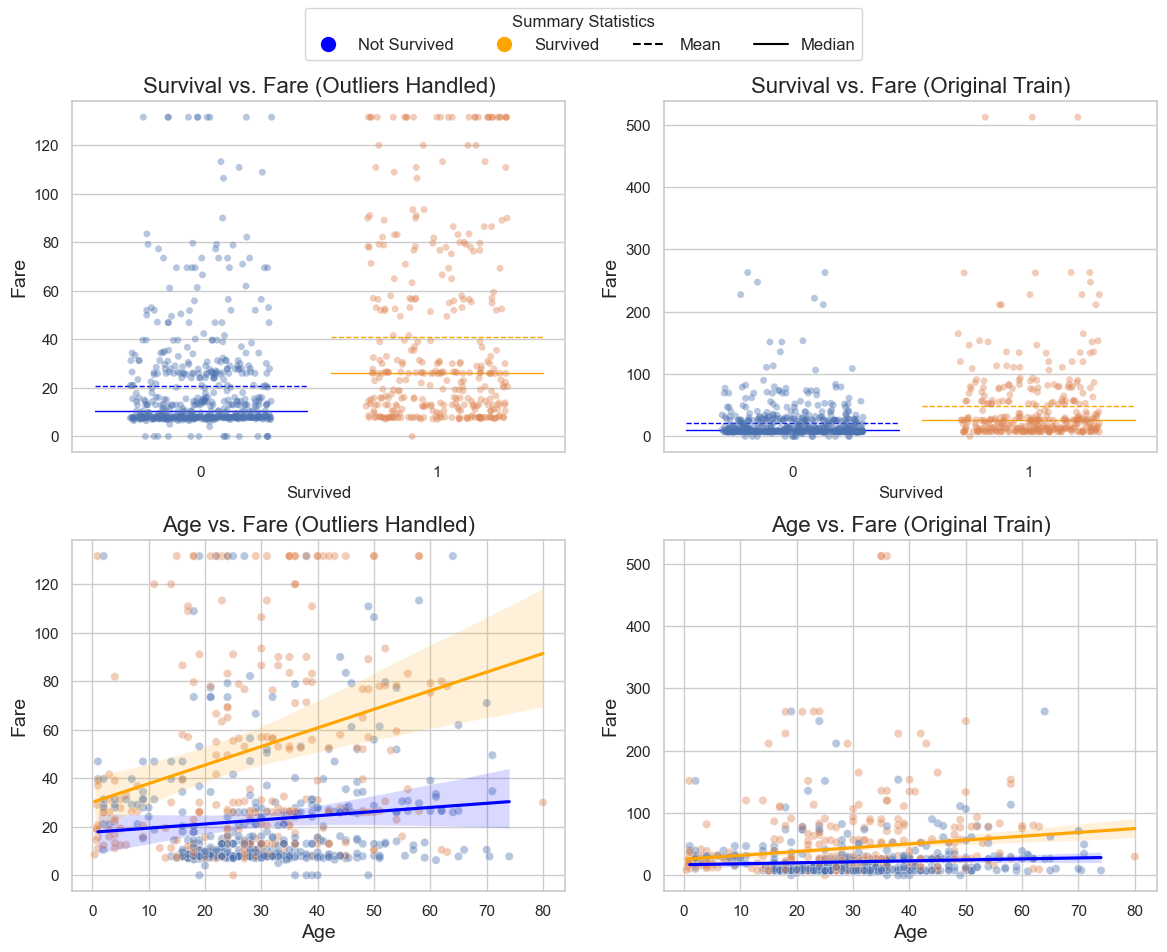

In [21]:
### Handling
# Create a copy of the original train DataFrame
filtered_train = train.copy()

# Calculate mean and standard deviation
mean_fare = filtered_train['Fare'].mean()
std_fare = filtered_train['Fare'].std()

# Define the threshold for outliers
lower_threshold = mean_fare - 2 * std_fare
upper_threshold = mean_fare + 2 * std_fare

# Cap the outliers
filtered_train['Fare'] = filtered_train['Fare'].clip(lower=lower_threshold, upper=upper_threshold)



### Visualization
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Create the scatter plot for filtered_train (Survived vs. Fare)
sns.stripplot(data=filtered_train, x='Survived', y='Fare', jitter=0.3, hue='Survived', alpha=0.4, ax=axs[0, 0], legend = False)
axs[0, 0].set_title('Survival vs. Fare (Outliers Handled)', fontsize=16)
#axs[0, 0].set_xlabel('Survived', fontsize=14)
axs[0, 0].set_ylabel('Fare', fontsize=14)

# Add mean and median lines for filtered_train
mean_fare_0 = filtered_train[filtered_train['Survived'] == 0]['Fare'].mean()
median_fare_0 = filtered_train[filtered_train['Survived'] == 0]['Fare'].median()
mean_fare_1 = filtered_train[filtered_train['Survived'] == 1]['Fare'].mean()
median_fare_1 = filtered_train[filtered_train['Survived'] == 1]['Fare'].median()

axs[0, 0].plot([-0.45, 0.45], [mean_fare_0, mean_fare_0], color='blue', linestyle='dashed', linewidth=1)
axs[0, 0].plot([-0.45, 0.45], [median_fare_0, median_fare_0], color='blue', linestyle='solid', linewidth=1)
axs[0, 0].plot([0.55, 1.45], [mean_fare_1, mean_fare_1], color='orange', linestyle='dashed', linewidth=1)
axs[0, 0].plot([0.55, 1.45], [median_fare_1, median_fare_1], color='orange', linestyle='solid', linewidth=1)

# Create the scatter plot for the original train (Survived vs. Fare)
sns.stripplot(data=train, x='Survived', y='Fare', jitter=0.3, hue='Survived', alpha=0.4, ax=axs[0, 1], legend = False)
axs[0, 1].set_title('Survival vs. Fare (Original Train)', fontsize=16)
#axs[0, 1].set_xlabel('Survived', fontsize=14)
axs[0, 1].set_ylabel('Fare', fontsize=14)

# Add mean and median lines for the original train
mean_fare_0 = train[train['Survived'] == 0]['Fare'].mean()
median_fare_0 = train[train['Survived'] == 0]['Fare'].median()
mean_fare_1 = train[train['Survived'] == 1]['Fare'].mean()
median_fare_1 = train[train['Survived'] == 1]['Fare'].median()

axs[0, 1].plot([-0.45, 0.45], [mean_fare_0, mean_fare_0], color='blue', linestyle='dashed', linewidth=1)
axs[0, 1].plot([-0.45, 0.45], [median_fare_0, median_fare_0], color='blue', linestyle='solid', linewidth=1)
axs[0, 1].plot([0.55, 1.45], [mean_fare_1, mean_fare_1], color='orange', linestyle='dashed', linewidth=1)
axs[0, 1].plot([0.55, 1.45], [median_fare_1, median_fare_1], color='orange', linestyle='solid', linewidth=1)

# Create the scatter plot for filtered_train (Age vs. Fare) with regression lines
sns.scatterplot(data=filtered_train, x='Age', y='Fare', hue='Survived', alpha=0.4, ax=axs[1, 0], legend = False)
sns.regplot(data=filtered_train[filtered_train['Survived'] == 0], x='Age', y='Fare', scatter=False, color='blue', ax=axs[1, 1], line_kws={'label': 'Not Survived'})
sns.regplot(data=filtered_train[filtered_train['Survived'] == 1], x='Age', y='Fare', scatter=False, color='orange', ax=axs[1, 1], line_kws={'label': 'Survived'})
axs[1, 0].set_title('Age vs. Fare (Outliers Handled)', fontsize=16)
axs[1, 0].set_xlabel('Age', fontsize=14)
axs[1, 0].set_ylabel('Fare', fontsize=14)

# Create the scatter plot for the original train (Age vs. Fare) with regression lines
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', alpha=0.4, ax=axs[1, 1], legend = False)
sns.regplot(data=train[train['Survived'] == 0], x='Age', y='Fare', scatter=False, color='blue', ax=axs[1, 0], line_kws={'label': 'Not Survived'})
sns.regplot(data=train[train['Survived'] == 1], x='Age', y='Fare', scatter=False, color='orange', ax=axs[1, 0], line_kws={'label': 'Survived'})
axs[1, 1].set_title('Age vs. Fare (Original Train)', fontsize=16)
axs[1, 1].set_xlabel('Age', fontsize=14)
axs[1, 1].set_ylabel('Fare', fontsize=14)


# Create custom legend lines
mean_line = mlines.Line2D([], [], color='black', linestyle='dashed', label='Mean')
median_line = mlines.Line2D([], [], color='black', linestyle='solid', label='Median')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Not Survived')
orange_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Survived')

# Add a single legend
fig.legend(handles=[blue_dot, orange_dot, mean_line, median_line], loc='upper center', fontsize=12, title='Summary Statistics', ncol=4)

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.25, top=0.9)
plt.show()


### **Analysis of Fare Outliers**

#### 1. *Survival vs. Fare (Outliers Handled vs. Original)*
   - Strip plots compare fare distribution between survivors and non-survivors, both before and after adjusting for outliers.
   - Capping the extreme values clarifies that higher fare is associated with a higher chance of survival.

#### 2. *Age vs. Fare (Outliers Handled vs. Original)*
   - Scatter plots with regression lines illustrate the relationship between age and fare.
   - Adjusting outliers makes it evident that higher fare correlates with a higher likelihood of survival, with a clearer pattern across different ages.

Handling outliers clarified the relationship between `fare` and `survived`, showing an apparent link where higher fares are associated with a higher chance of survival.

---

### **Survival vs. Fare & Survival vs. Age**

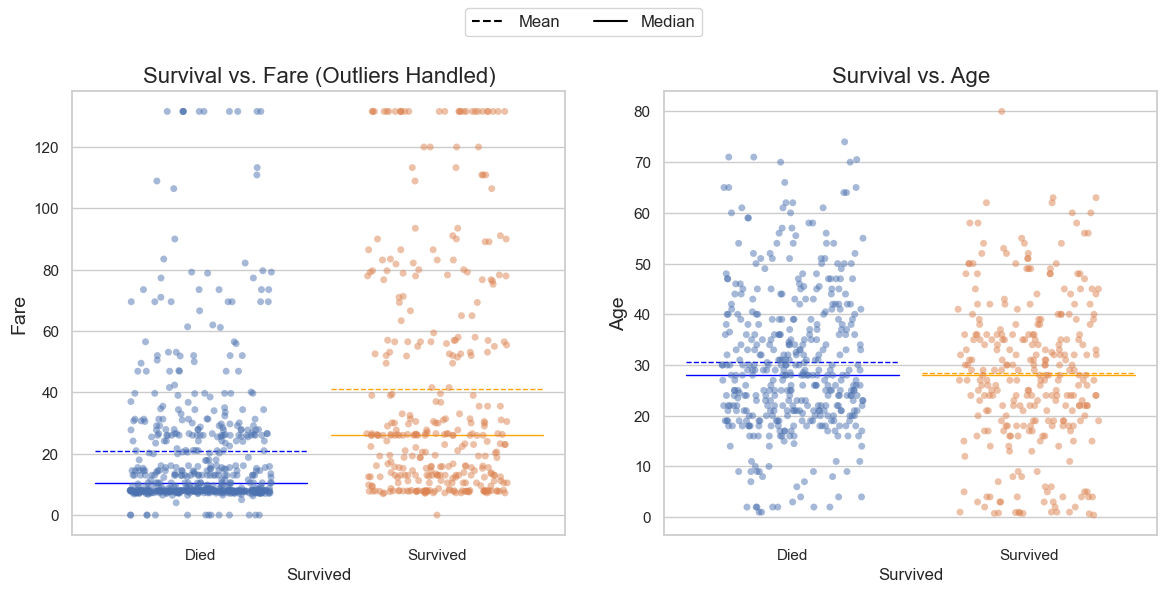

In [24]:
# First Figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 1. Scatter plot for filtered_train (Survival vs. Fare)
sns.stripplot(data=filtered_train, x='Survived', y='Fare', jitter=0.3, hue='Survived', alpha=0.5, ax=axs[0], legend=False)
axs[0].set_title('Survival vs. Fare (Outliers Handled)', fontsize=16)
axs[0].set_ylabel('Fare', fontsize=14)
axs[0].set_xticklabels(['Died','Survived'])


# Add mean and median lines for filtered_train (Survival vs. Fare)
mean_fare_0 = filtered_train[filtered_train['Survived'] == 0]['Fare'].mean()
median_fare_0 = filtered_train[filtered_train['Survived'] == 0]['Fare'].median()
mean_fare_1 = filtered_train[filtered_train['Survived'] == 1]['Fare'].mean()
median_fare_1 = filtered_train[filtered_train['Survived'] == 1]['Fare'].median()

axs[0].plot([-0.45, 0.45], [mean_fare_0, mean_fare_0], color='blue', linestyle='dashed', linewidth=1)
axs[0].plot([-0.45, 0.45], [median_fare_0, median_fare_0], color='blue', linestyle='solid', linewidth=1)
axs[0].plot([0.55, 1.45], [mean_fare_1, mean_fare_1], color='orange', linestyle='dashed', linewidth=1)
axs[0].plot([0.55, 1.45], [median_fare_1, median_fare_1], color='orange', linestyle='solid', linewidth=1)

# 2. Scatter plot for Age
sns.stripplot(data=train, x='Survived', y='Age', jitter=0.3, hue='Survived', alpha=0.5, ax=axs[1], legend=False)
axs[1].set_title('Survival vs. Age', fontsize=16)
axs[1].set_ylabel('Age', fontsize=14)
axs[1].set_xticklabels(['Died','Survived'])

# Add mean and median lines for train (Survival vs. Age)
mean_age_0 = train[train['Survived'] == 0]['Age'].mean()
median_age_0 = train[train['Survived'] == 0]['Age'].median()
mean_age_1 = train[train['Survived'] == 1]['Age'].mean()
median_age_1 = train[train['Survived'] == 1]['Age'].median()

axs[1].plot([-0.45, 0.45], [mean_age_0, mean_age_0], color='blue', linestyle='dashed', linewidth=1)
axs[1].plot([-0.45, 0.45], [median_age_0, median_age_0], color='blue', linestyle='solid', linewidth=1)
axs[1].plot([0.55, 1.45], [mean_age_1, mean_age_1], color='orange', linestyle='dashed', linewidth=1)
axs[1].plot([0.55, 1.45], [median_age_1, median_age_1], color='orange', linestyle='solid', linewidth=1)

# Create custom legend lines
mean_line = mlines.Line2D([], [], color='black', linestyle='dashed', label='Mean')
median_line = mlines.Line2D([], [], color='black', linestyle='solid', label='Median')
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Died')
orange_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Survived')

# Add a single legend
fig.legend(handles=[mean_line, median_line], loc='upper center', fontsize=12, ncol=4)

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.3, top=0.85)
plt.show()


### **Analysis**

#### 1. *Survival vs. Fare (Outliers Handled)*
   - There is a clear relationship between `survival` and `fare`.
   - Passengers with lower fares were less likely to survive than those with higher fares.
   - The median fare for non-survivors was `$10.50`, while for survivors it was `$26.00`.
   - This difference likely stems from lower fare cabins being located on lower decks, leaving passengers with less time to evacuate, and higher fare cabins being on upper decks, giving first-class passengers quicker access to lifeboats.
   - This relationship underscores the influence of socioeconomic factors on survivability.

#### 2. *Survival vs. Age*
   - There is minimal evidence to suggest a strong relationship between `survival` and `age`.
   - While younger children had higher survival rates, adults generally experienced similarly low survival rates across the board.
   - The median age for both survivors and non-survivors was `28`, indicating little variation.

---

### **Survival vs. Passenger Class & Survival vs. Sex**

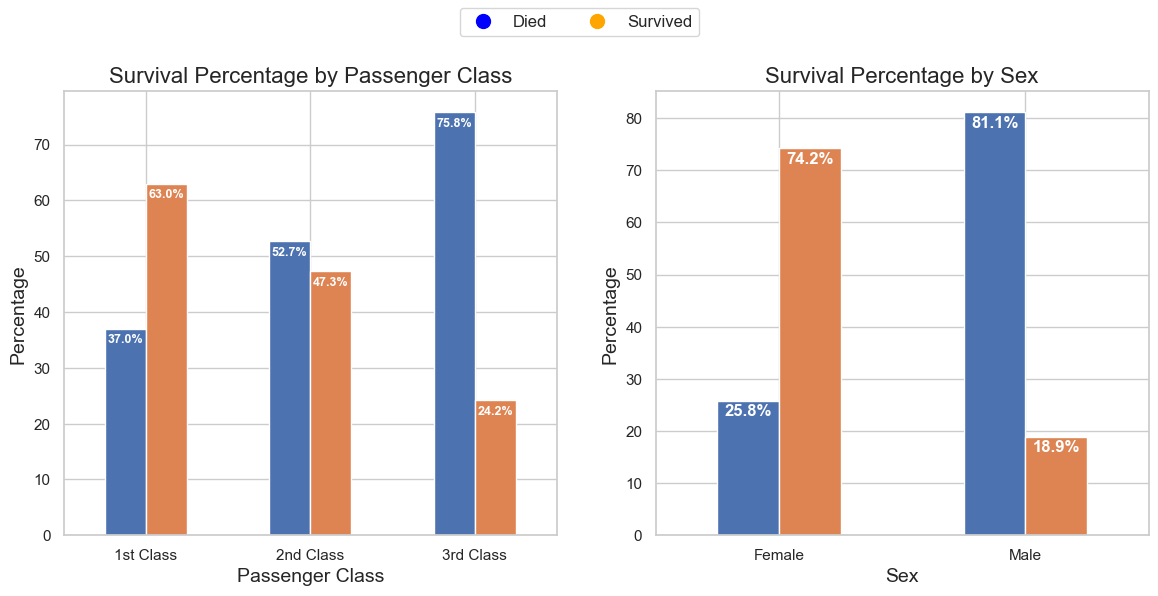

In [27]:
# Second Figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 3. Bar plot for Pclass
count_data_pclass = train.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
ax1 = count_data_pclass.plot(kind='bar', ax=axs[0], legend=False)
axs[0].set_title('Survival Percentage by Passenger Class', fontsize=16)
axs[0].set_xlabel('Passenger Class', fontsize=14)
axs[0].set_ylabel('Percentage', fontsize=14)
axs[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

# Annotate bars with percentages for Pclass
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height - 2),
                 ha='center', va='center', color='white', fontsize=9, weight='bold')

# 4. Bar plot for Sex
count_data_sex = train.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100
ax2 = count_data_sex.plot(kind='bar', ax=axs[1], legend=False)
axs[1].set_title('Survival Percentage by Sex', fontsize=16)
axs[1].set_xlabel('Sex', fontsize=14)
axs[1].set_ylabel('Percentage', fontsize=14)
axs[1].set_xticklabels(['Female', 'Male'], rotation=0)

# Annotate bars with percentages for Sex
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height - 2),
                 ha='center', va='center', color='white', fontsize=12, weight='bold')

# Create custom legend lines
blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Died')
orange_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=10, label='Survived')

# Add a single legend
fig.legend(handles=[blue_dot, orange_dot], loc='upper center', fontsize=12, ncol=4)

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.3, top=0.85)
plt.show()


### **Analysis**

#### 1. *Survival vs. Passenger Class*
   - There is a clear relationship between `survival` and `pclass`.
   - Passengers in lower classes were less likely to survive than those in higher classes.
   - First class passengers had a **63.0%** survival rate, likely due to their proximity to lifeboats and prioritized access during evacuation.
   - Only **24.2%** of third class passengers survived, possibly because of their lower deck locations and delayed access to lifeboats.
   - This relationship underscores the significant impact of socioeconomic factors on survivability.


#### 2. *Survival vs. Sex*
   - There is a strong relationship between `survival` and `sex`.
   - Women had a **74.2%** survival rate, while men had only an **18.9%** survival rate, highlighting the significant impact of sex on survival outcomes.

---

### **Data Transformation**

##### 1. Handle Null/Missing Values:

- **`Age`:**
  - Number of Nulls: 177
  - Percentage of Column: 20%
  - Description for Handling: Drop records with null values

- **`Embarked`:**
  - Number of Nulls: 2
  - Percentage of Column: <1%
  - Description for Handling: Impute with mode (S)

- **`Cabin`:**
  - Number of Nulls: 687
  - Percentage of Column: 77%
  - Description for Handling: Recode missing cabin numbers
 
##### 2. Convert the **`Cabin`** column to the first letter (indicating the deck) and fill missing values with 'N'


##### 3. Drop the **`Ticket`** and **`Name`** columns as they provide little utilizable data


##### 4. Add Columns:

- **`Total_Fam`**  
  - This column represents the total number of family members aboard for each passenger.
  - Calculated by adding the number of siblings/spouses (`SibSp`) and parents/children (`Parch`).

- **`Adult_M`** 
  - This column identifies whether a passenger is male and at least 18 years old.

- **`Is_Crew`**  
  - This column identifies passengers as crew members if their `fare` was equal to 0.


In [30]:
# 1a. Handle missing values for Age by dropping null records
train2 = train.dropna(subset=['Age'])

# 1b. Handle missing values for Embarked by imputing with the mode ('S')
train2['Embarked'].fillna('S', inplace=True)

# 2. Convert cabin to first letter and fill missing values with 'N'
train2['Cabin'] = train['Cabin'].fillna('N').map(lambda x: x[0])

# 3. Drop the Name and Ticket column from the dataset
train2 = train2.drop(columns=['Ticket', 'Name'])

# 4. Add new columns:
train2['Total_Fam'] = train2['SibSp'] + train2['Parch']
train2['Adult_M'] = (train2['Sex'] == 'male') & (train2['Age'] >= 18)
train2['Is_Crew'] = train2['Fare'] == 0

train2.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Total_Fam,Adult_M,Is_Crew
169,170,0,3,male,28.0,0,0,56.4958,N,S,0,True,False
317,318,0,2,male,54.0,0,0,14.0000,N,S,0,True,False
437,438,1,2,female,24.0,2,3,18.7500,N,S,5,False,False
14,15,0,3,female,14.0,0,0,7.8542,N,S,0,False,False
189,190,0,3,male,36.0,0,0,7.8958,N,S,0,True,False


---

### **Survival vs. Number of Family Members**

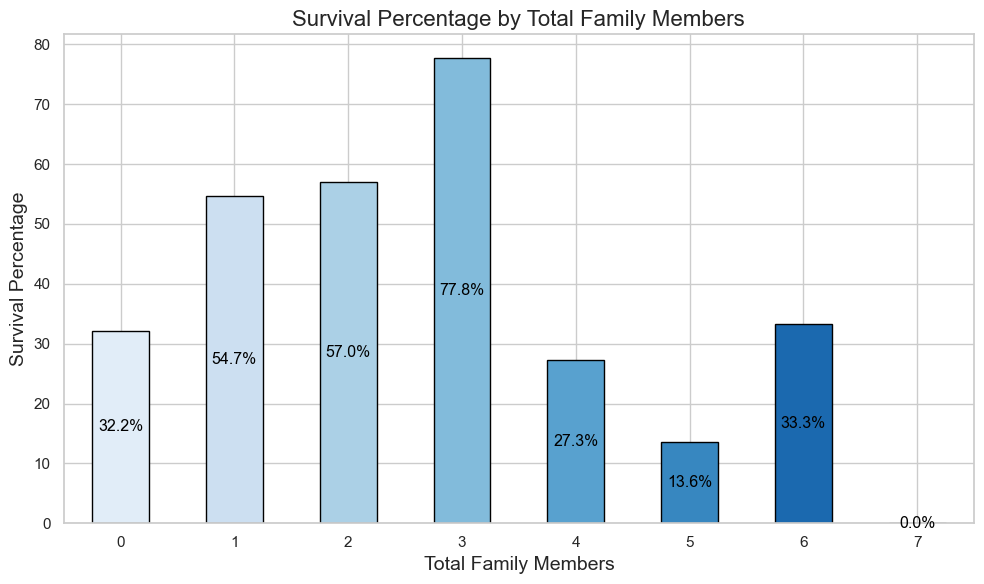

In [32]:
# Calculate the survival percentages for each Total_Fam value
survival_percentages = train2.groupby('Total_Fam')['Survived'].mean() * 100

# Create the plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(survival_percentages))
ax = survival_percentages.plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels
ax.set_title('Survival Percentage by Total Family Members', fontsize=16)
ax.set_xlabel('Total Family Members', fontsize=14)
ax.set_ylabel('Survival Percentage', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Annotate percentages inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height /2), 
                ha='center', va='center', 
                fontsize=11.5, color='black', 
                xytext=(0, 0), 
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


### **Analysis**

- *Low Survival Rates*:
  - Categories with **Total_Fam = 0, 4, 5, 6, 7** generally exhibit lower survival rates. This trend suggests that individuals or very large groups may have faced challenges in accessing lifeboats or evacuating effectively.

- *Moderate Survival Rates*:
  - Categories with **Total_Fam = 1, 2, 3** display higher survival rates compared to the more extreme categories. This implies that having a small to moderate family size might have been beneficial for survival, possibly due to better access to evacuation resources.

- *Overall Variability*:
  - Despite identifying these patterns, the survival rates show considerable variability. This variability highlights that survival chances were influenced by factors beyond family size, including cabin location, proximity to lifeboats, and other situational factors during the evacuation.

---

### **Potential Crew/Officers**

During the investigation of fare outliers, several individuals were identified who had paid `$0` for their tickets.

One possible explanation is that these records should be marked as `NULL` instead of `$0`. However, given that other continuous variables in the dataset, such as `age`, also have `NULL` values, it seems unusual to replace `NULL` with `$0` solely for the `fare` variable.

Grouping these individuals revealed several similarities:

- #### ***Demographics***: All are men aged between 19 and 49.
  - This demographic aligns with crew members onboard the Titanic in 1912.
- #### ***Embarkation*** All boarded from Southampton.
  - While this could be coincidental, all crew members boarded from Southampton.
- #### ***Family Status*** None had family members on board.
  - Indicating these individuals could be onboard for employment rather than leisure.
- #### ***Survival Rate*** Only one of the fifteen individuals survived.
  - Crew members, particularly officers, would have been expected to "go down with the ship."
  - Additionally working crew members would likely be on the lowest levels of the ship

It is likely that these individuals were officers on the RMS Titanic, given their demographic profile and additional contextual evidence.

Upon further research, I found that some of these individuals were listed on the Titanic's crew Wikipedia page, specifically under the guarantee group: [Crew of the Titanic](https://en.wikipedia.org/wiki/Crew_of_the_Titanic).

The description of the guarantee group further explains why these individuals were included in the passenger dataset:

> "Though the nine-member guarantee group were **given passenger accommodation**, they were also **regarded as members of the crew**. Headed by the ship's designer, Thomas Andrews, the group's responsibility was to accompany the ship on her maiden voyage to oversee any unfinished work or address any issues that might arise during the voyage. The entire group perished; none of their bodies were recovered."


In [35]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


---

### **Correlation Table**

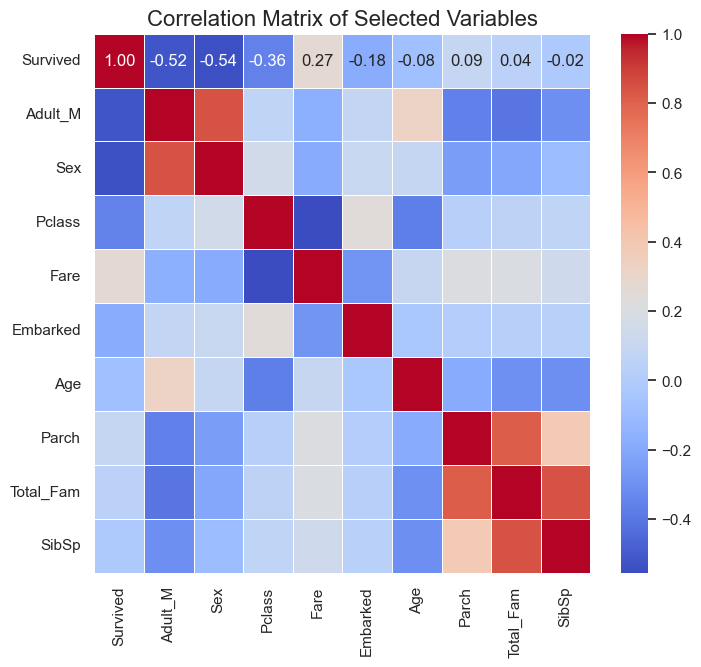

In [37]:
# Make a copy of the train dataset
train_corr = train2.copy()

# Convert 'Embarked' to numeric
train_corr['Embarked'] = train_corr['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Convert Sex column to binary
train_corr['Sex'] = train['Sex'] == 'male'

# Select relevant columns
correlation_subset = train_corr[['Survived', 'Adult_M', 'Sex', 'Pclass', 'Fare', 'Embarked', 'Age', 'Parch', 'Total_Fam', 'SibSp']]

# Calculate correlation matrix
correlation_matrix = correlation_subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Variables', fontsize=16)
plt.show()

### **Correlation Table Summary**

1. **Sex**: Strong negative correlation with survival (Male = 1).
2. **Adult Males**: Strong negative correlation with survival.
4. **Passenger Class**: Negative correlation with survival.
5. **Fare**: Moderate positive correlation with survival, less significant than Passenger Class.
6. **Embarked**: Weak negative correlation with survival.
7. **Age**: Weak negative correlation with survival.


## **Modeling**

### **Logistic Regression (All Variables)**

In [41]:
# Features and target variable
X = train2.drop(columns=['PassengerId', 'Survived'])
y = train2['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Cabin']
numerical_features = ['Pclass', 'Adult_M', 'Fare', 'Age', 'Parch', 'Total_Fam', 'SibSp']

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, val_predictions)
report = classification_report(y_val, val_predictions)

print(f"Accuracy: {(accuracy*100).round(2)}%")
print("Classification Report:")
print(report)

Accuracy: 79.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        87
           1       0.74      0.71      0.73        56

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



#### **Analysis of Logistic Regression (All Variables)**

The initial logistic regression model, which included all potential variables without selection, achieved a baseline accuracy of 79.02%. The classification report showed a precision of 0.82, recall of 0.84, and an F1 score of 0.83 for class 0 (non-survivors), while class 1 (survivors) had a precision of 0.74, recall of 0.71, and an F1 score of 0.73. These results provide a starting point for further model refinement and variable selection.

---

### **Logistic Regression (without Age, Fare)**

In refining the model, several variables were excluded to enhance its predictive accuracy and reduce potential noise. The variables `age` and `fare` were removed because they appeared to introduce unnecessary complexity. Specifically, `fare` likely introduced multicollinearity with `pclass`, as `fare` prices are closely correlated with passenger class. The variable `age`, on the other hand, did not provide significant predictive value in this context.

Additionally, the variables `sibsp` and `parch` were omitted due to their potential collinearity with the `Total_fam` variable. The latter encapsulates the information provided by both `sibsp` and `parch`, making it a more comprehensive indicator of family size. Consequently, `Total_fam` was retained as it offered a clearer and more indicative measure of the passenger's family situation.

While the variable `Is_Crew` did not negatively impact the model's accuracy in this iteration, it was removed as a precautionary measure. Including `Is_Crew` could potentially introduce noise in future applications, especially if the focus shifts to different passenger groups or datasets. 

By streamlining the model and eliminating variables that do not contribute meaningfully or that may cause ambiguity, the model's robustness and generalizability were improved.

In [74]:
# Features and target variable
X = train2.drop(columns=['PassengerId', 'Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Is_Crew'])
y = train2['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['Pclass', 'Embarked', 'Sex', 'Adult_M', 'Cabin']
numerical_features = ['Total_Fam']

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, val_predictions)
report = classification_report(y_val, val_predictions)

print(f"Accuracy: {(accuracy*100).round(2)}%")
print("Classification Report:")
print(report)

# Extract the coefficients and feature names
classifier = model.named_steps['classifier']
preprocessor = model.named_steps['preprocessor']

# Get feature names
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(ohe_feature_names)

# Create a DataFrame for coefficients
coefficients = classifier.coef_[0]
coeff_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

print("Coefficient Table:")
coeff_df

Accuracy: 83.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        87
           1       0.79      0.79      0.79        56

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143

Coefficient Table:


,Coefficient
Adult_M_False,1.097714
Cabin_E,0.814699
Pclass_1,0.594432
Sex_female,0.543228
Cabin_D,0.444556
Embarked_C,0.410946
Cabin_F,0.292721
Cabin_B,0.233315
Pclass_2,0.109805
Cabin_A,0.073270


### **Model Performance Summary**

The model demonstrates strong performance with an accuracy of 83.22% and F1 scores of 0.86 for class 0 (non-survivors) and 0.79 for class 1 (survivors). This indicates that the model is both accurate and reliable in predicting survival outcomes. Key features such as socioeconomic class, sex, family, and other demographic factors significantly influence the model's predictions.


#### 1. Adult Male Status: **Adult men are significantly less likely to survive**
  - `Adult_M_False (1.09)`: Indicates a higher likelihood of survival for those not being an adult male.
  - `Adult_M_True (-1.09)`: Shows a decreased likelihood of survival for adult males.


#### 2. Passenger Class: **First class passengers were more likely to survive than lower class passengers**
  - `Pclass_1 (0.59)`: Reflects a higher chance of survival for first-class passengers.
  - `Pclass_2 (0.11)`: Conveys a smaller chance of survival for second-class passengers.
  - `Pclass_3 (-0.70)`: Highlights a significantly decreased chance of survival for third-class passengers.
 
#### 3. Embarkation: **Passengers that embarked from Cherbourg were more likely to survive than the other ports of origin**
  - `Embarked_C (0.41)`: Reflects a higher chance of survival for passengers embarking from Cherbourg.
  - `Embarked_S (-0.12)` and `Embarked_Q (-0.29)`: Shows a slightly decreased chance of survival for passengers embarking from port Southampton or Queenstown.

#### 4. Cabin Decks: **Survivability by decks was most likely dictated by proximity to lifeboats and passenger class priorty**
 
   - ***Positive Impact on Survival***:
       - `Cabin E (0.815)`: This cabin has the highest positive coefficient among the cabins, indicating it significantly increases the likelihood of survival.
       - `Cabin D (0.445)`: Also shows a positive impact, suggesting that passengers in Cabin D had better survival chances.
       - `Cabin F (0.293)`: While less significant than E and D, it still contributes positively to survival.

   - ***Neutral to Slightly Positive Impact***:
       - `Cabin B (0.233)`: Slightly positive, but not as impactful as E, D, or F.
       - `Cabin A (0.073)`: Minimal positive impact, indicating that Cabin A had a marginally better chance of survival compared to some others.

   - ***Negative Impact on Survival***:
       - `Cabin N (-0.685)`: The most negative coefficient among the cabins, indicating a substantial decrease in the likelihood of survival for those without a deck position listed.
       - `Cabin G (-0.535)`: Also negatively impacts survival significantly.
       - `Cabin C (-0.332)` and `Cabin T (-0.307)`: Both cabins show a negative impact, though not as pronounced as Cabins N or G.

#### 5. Family: **Having more family members on board negatively affected survivability**
  - `Total_Fam (-0.322)`: Each additional family member is associated with a decrease in the log odds of survival by 0.322.

---

### **Confusion Matrix**

This confusion matrix provides a visual representation of the final model's accuracy.

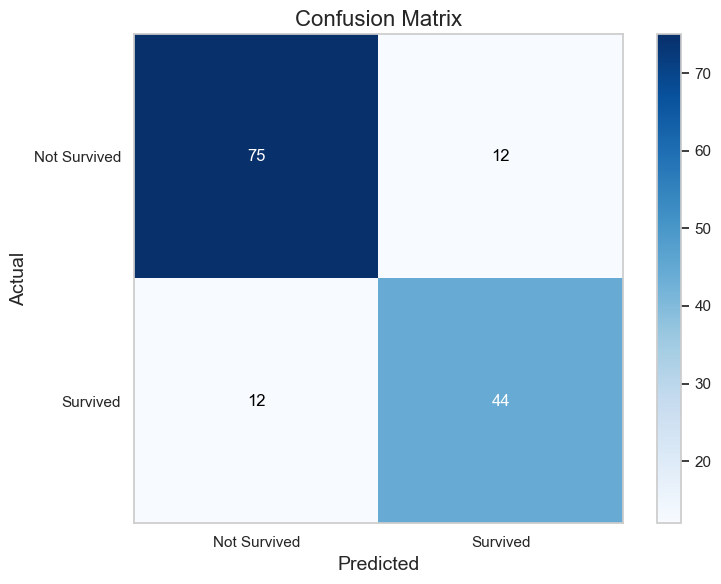

In [47]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Plot the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.colorbar()
plt.xticks(np.arange(2), ['Not Survived', 'Survived'], rotation=0)
plt.yticks(np.arange(2), ['Not Survived', 'Survived'])

# Add labels to the matrix
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

## **Conclusion**

 This project has successfully developed a machine learning model to predict passenger survival from the Titanic disaster, achieving an accuracy of **83.22%** and F1 scores of **0.86** for non-survivors and **0.79** for survivors. The analysis of key variables such as age, gender, and passenger class has revealed significant insights into the factors influencing survival rates. The model highlights that demographic and socio-economic factors, including being female, first-class travel, and certain cabin locations, played a crucial role in determining survival chances.

Despite the Titanic sinking over a century ago, the findings from this study offer valuable historical context and underscore the impact of socio-economic disparities on survival during emergencies. By examining these factors, the research not only sheds light on past events but also contributes to ongoing discussions about safety protocols and socio-economic inequalities in contemporary settings. Understanding these historical factors can help inform future safety measures and provide a deeper appreciation of the historical and social implications of maritime disasters.